# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

### Содержание
### [1. Подготовка данных](#section_id1)
### [2. Анализ данных](#section_id2)
### [3. Модель](#section_id3)
### [4. Вывод](#section_id4)

<a id='section_id1'></a>

# 1. Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#обучающая выборка
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
#тестовая выборка
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [4]:
#исходные данные датафрейма
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Видим, что у нас имеются пропуски (rougher.output.recovery = 19597). Если мы удалим порядка 3000 строк, то потеряем около 13% данных. Будем думать что делать с пропусками. (rougher.output.recovery - целевой признак, то можем заполнить на основе предсказаний).

In [6]:
def recovery(c,f,t):
    num1 = c * (f - t)
    num2 = f * (c - t)
    recovery = (num1/num2) * 100
    #так как у нас результат выражается в процентах, то учтем данный нюанс
    recovery[recovery<0] = np.nan
    recovery[recovery>100] = np.nan
    return recovery

In [7]:
c, f, t = df_train['rougher.output.concentrate_au'], df_train['rougher.input.feed_au'], df_train['rougher.output.tail_au']


In [8]:
recovery = recovery(c,f,t)
recovery.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [9]:
recovery = recovery.dropna()
recovery_train = df_train['rougher.output.recovery'].dropna()

In [10]:
mean_absolute_error(recovery_train, recovery)

9.444891926100695e-15

Погрешность небольшая, поэтому посчитано все правильно

In [11]:
#проверим каких признаков нет в тестовой выборке
column = []
for i in df_train.columns:
    if not i in df_test.columns:
        column.append(i)

In [12]:
column

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Как видим, в тестовой выборке отсутствуют полностью параметры продукта на всех этапах. В тестовой есть параметры сырья (видимо они изначально известны на всех этапах технологического процесса), даже есть параметры, характеризующие текущее состояние этапа (известно какой уровень жидкости должен быть, объем воздуха для флотационной установки). Ну и нет расчетных хар-к в тестовой выборке (они скорее всего расчитываются далее по ходу технологического процесса).

### Предобработка данных

In [13]:
def total_nan(df):
    tot1 = df.isnull().sum()
    tot2 = df.isna().sum()
    total = tot1 + tot2
    division = total / len(df)
    return total, division

In [14]:
total_nan_train, division_train = total_nan(df_train)

In [15]:
df_train_na = pd.DataFrame({'percent':division_train,
                     'sum_nan':total_nan_train})
df_train_na[df_train_na['percent']>0.05]

,percent,sum_nan
final.output.recovery,0.180427,3042
primary_cleaner.input.sulfate,0.155042,2614
primary_cleaner.input.depressant,0.149703,2524
primary_cleaner.input.xanthate,0.116845,1970
primary_cleaner.output.concentrate_sol,0.075445,1272
rougher.calculation.au_pb_ratio,0.147331,2484
rougher.input.feed_rate,0.060854,1026
rougher.input.floatbank10_sulfate,0.123843,2088
rougher.input.floatbank11_sulfate,0.073903,1246
rougher.input.floatbank11_xanthate,0.225860,3808


In [16]:
total_nan_test, division_test = total_nan(df_test)

In [17]:
df_test_na = pd.DataFrame({'percent':division_test,
                     'sum_nan':total_nan_test})
df_test_na[df_test_na['percent']>0.05]

,percent,sum_nan
primary_cleaner.input.sulfate,0.103142,604
primary_cleaner.input.depressant,0.096995,568
primary_cleaner.input.xanthate,0.056694,332
rougher.input.floatbank10_sulfate,0.087773,514
rougher.input.floatbank11_xanthate,0.120560,706


В обучающей выборке кол-во пропусков по некоторым столбцам составляет колоссальные 27 процентов, т.е просто так удалять тоже как-то рискованно. В тестовой все проще, максимум 12 процентов (правда тоже очень много, но все же). Для последующей работы удалим из обучающей выборки те признаки, которые не вошли в тестовую выборку. Также в дальнейшем нам лучше будет делать 2 модели (одну на этапе флотации, вторую на этапе очисток, ибо они друг от друга не зависят).

In [18]:
#лучше наверное будет целевыми признаками назначить концентрацию и хвосты (предсказывать их), 
#а уже потом считать по ним recovery
train = df_train[df_test.columns]#оставляем только те признаки, которые имеются в тестовой выборке

#создадим еще один датасет, добавив целевые признаки
train_plus_target = train.merge(df_train[['date',
                                         'rougher.output.tail_au',
                                         'rougher.output.concentrate_au',
                                         'final.output.tail_au',
                                         'final.output.concentrate_au']], on='date', how='left')

train_plus_target = train_plus_target.dropna()#удалим все Nanы, т.к. они нам помешают при машинном обучении, а как их заполнять
#ума не приложу

train = train_plus_target.drop(['rougher.output.tail_au',
                               'rougher.output.concentrate_au',
                               'final.output.tail_au',
                               'final.output.concentrate_au'], axis=1)

#добавим в тестовую выборку целевые признаки 'final.output.tail_au','final.output.concentrate_au', 'rougher.output.tail_au',
#'rougher.output.concentrate_au'
df_test_date_index = df_test.set_index(['date'])
df_full_date_index = df_full.set_index(['date'])
target_test = df_full_date_index.loc[df_test_date_index.index,['final.output.tail_au',
                                                               'final.output.concentrate_au', 
                                                               'rougher.output.tail_au',
                                                               'rougher.output.concentrate_au']
                                    ]

df_test.reset_index().drop(['index'], axis=1)
target_test.reset_index()
df_test = df_test.merge(target_test, on='date', how='left')
df_test = df_test.dropna()

test = df_test.drop(['final.output.tail_au', 
                     'final.output.concentrate_au',
                     'rougher.output.tail_au',
                     'rougher.output.concentrate_au'], axis=1)

#датафрейм с признаками rougher
rougher_cols = train.columns.str.contains('rougher')#выбираем только те столбцы в которых имеется корень rougher
features_train_rougher = train.loc[:, rougher_cols]
target_train_rougher = train_plus_target[['rougher.output.tail_au','rougher.output.concentrate_au']]
features_test_rougher = test.loc[:, rougher_cols]
target_test_rougher = df_test[['rougher.output.tail_au','rougher.output.concentrate_au']]

#датафрейм с признаками cleaner
cleaner_cols = train.columns.str.contains('cleaner')
features_train_cleaner = train.loc[:, cleaner_cols]
target_train_cleaner = train_plus_target[['final.output.tail_au','final.output.concentrate_au']]
features_test_cleaner = test.loc[:, cleaner_cols]
target_test_cleaner = df_test[['final.output.tail_au','final.output.concentrate_au']]

<a id='section_id2'></a>

# 2. Анализ данных

In [19]:
#напишем функцию которая строит графики для концентрации металлов на каждом этапе очистки
def graphs_metal(df, col1, col2, col3, col4, title):
    df_stage = df[[col1, col2, col3, col4]]
    ax = df_stage.plot(kind='kde', figsize=(15,9), grid=True, title=title)
    ax.legend(['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'])

### Концентрация металлов на выходе

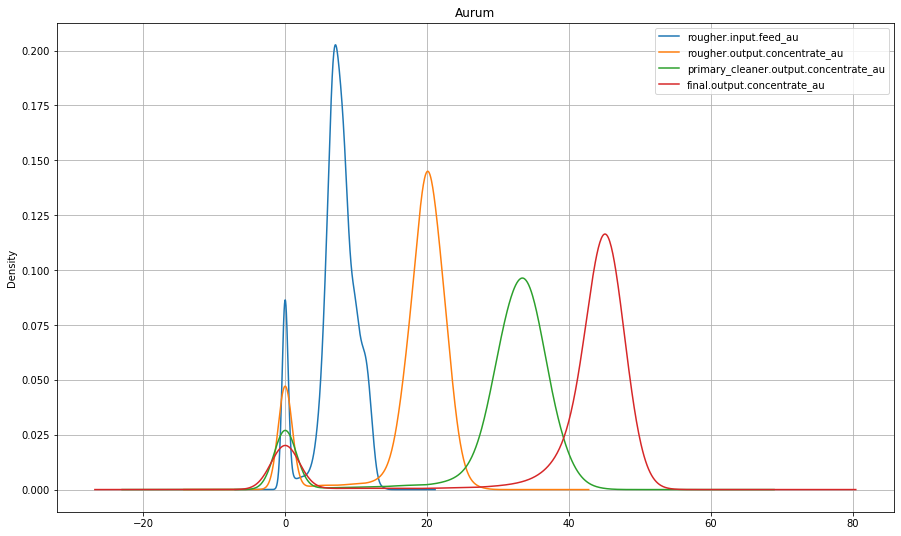

In [20]:
graphs_metal(df_train, 'rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 'Aurum')

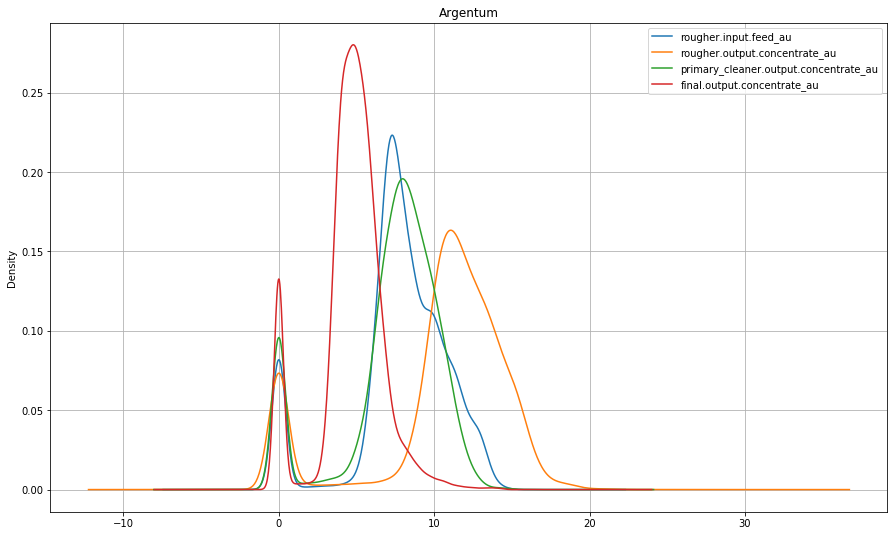

In [21]:
graphs_metal(df_train, 'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'Argentum')

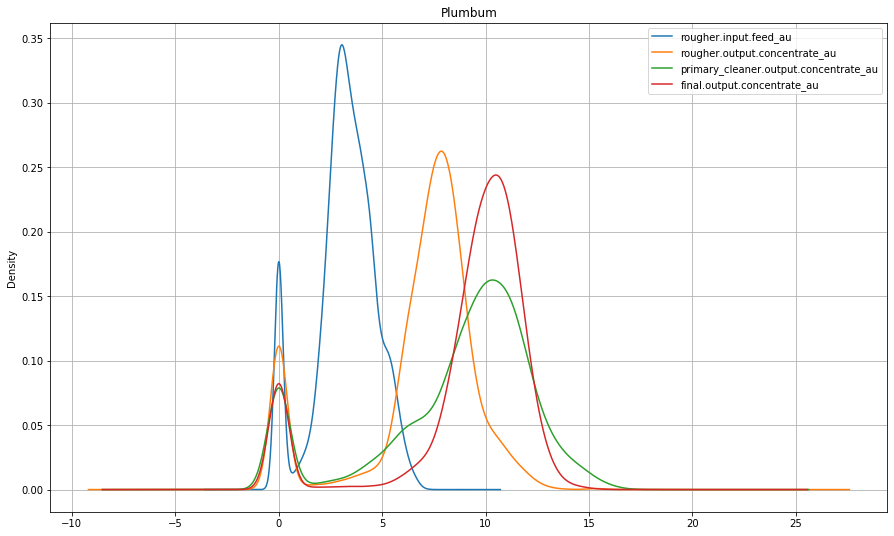

In [22]:
graphs_metal(df_train, 'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 'Plumbum')

Видим, что концентрация золота на выходе составляет около 12%. На финальной стадии концентрация серебра вырастает. Далее посчитаем концентрацию хвостов

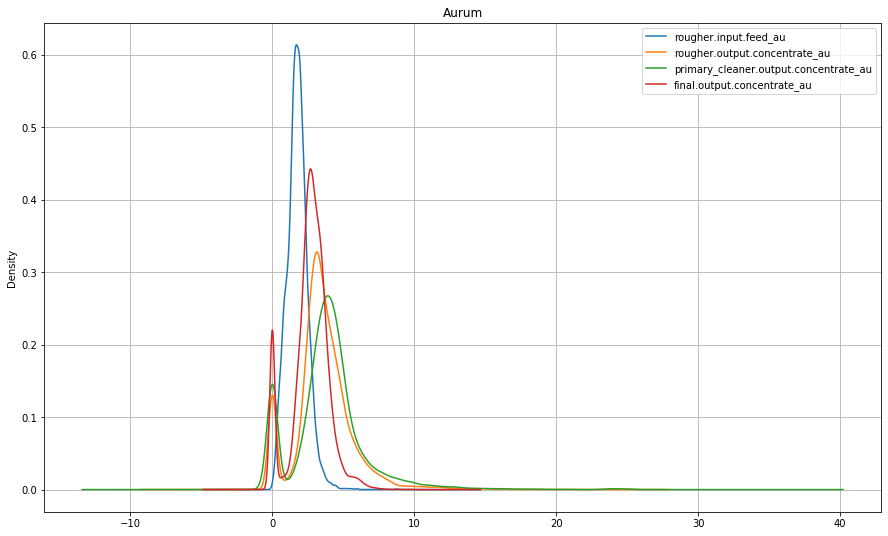

In [23]:
graphs_metal(df_train, 'rougher.output.tail_au', 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_au', 'final.output.tail_au', 'Aurum')

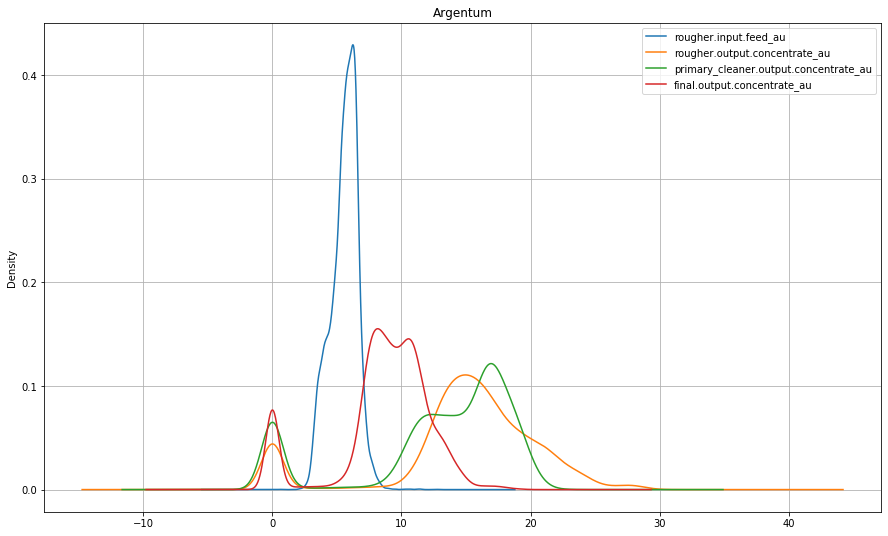

In [24]:
graphs_metal(df_train, 'rougher.output.tail_ag', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_ag', 'final.output.tail_ag', 'Argentum')

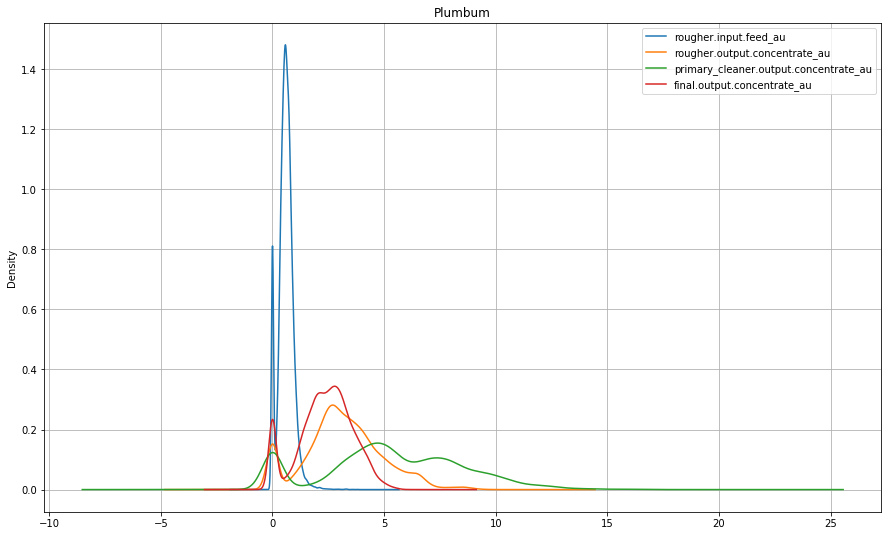

In [25]:
graphs_metal(df_train, 'rougher.output.tail_pb', 'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_pb', 'final.output.tail_pb', 'Plumbum')

После флотации концентрация очень большая, однако на финальном этапе концентрация в хвосте уменьшается.

Необходимо проверить распределения размеров гранул сырья на обучающей и тестовой выборках

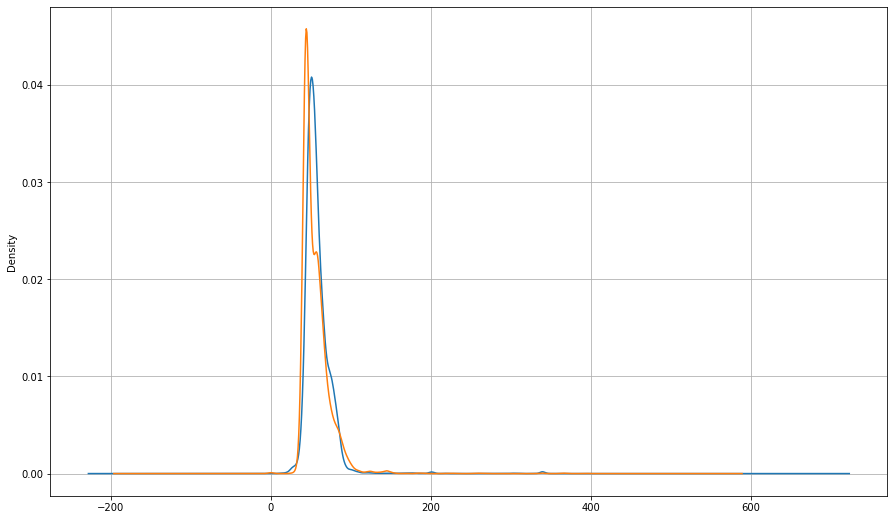

In [26]:
train['rougher.input.feed_size'].plot(kind='kde', figsize=(15,9), grid=True)
df_test['rougher.input.feed_size'].plot(kind='kde', figsize=(15,9), grid=True)

Судя по графику распределения практически идентичны и оценка модели должна быть правильной

На данном этапе необходимо исследовать суммарную концентрацию всех веществ на разных стадиях: сырье, черновой и финальный концентраты

In [27]:
#напишем функцию, которая считает сумму и строит график
def sum_concentrate(df, col1, col2, col3, title):
    df['summary'] = df[col1] + df[col2] + df[col3]
    df['summary'].plot(kind='kde', figsize=(15,9), title=title, grid=True)

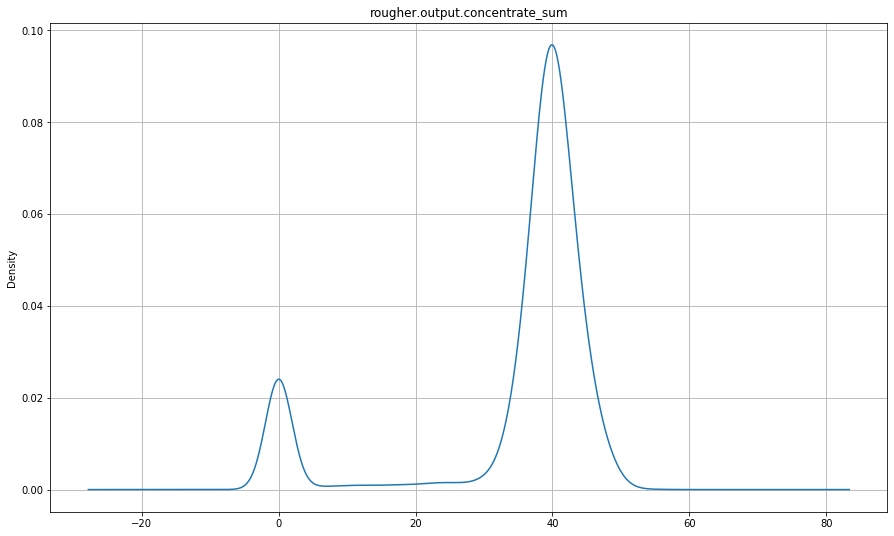

In [28]:
sum_concentrate(df_train, 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sum')

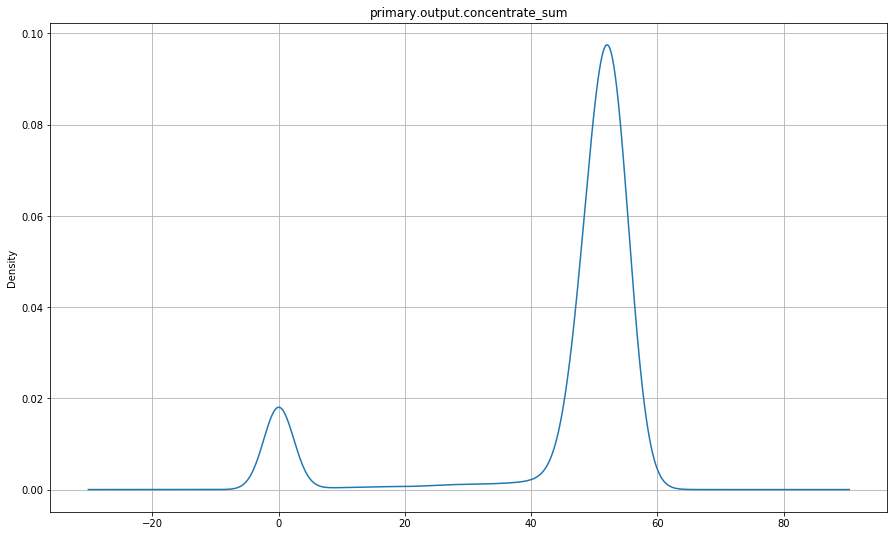

In [29]:
sum_concentrate(df_train, 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary.output.concentrate_sum')

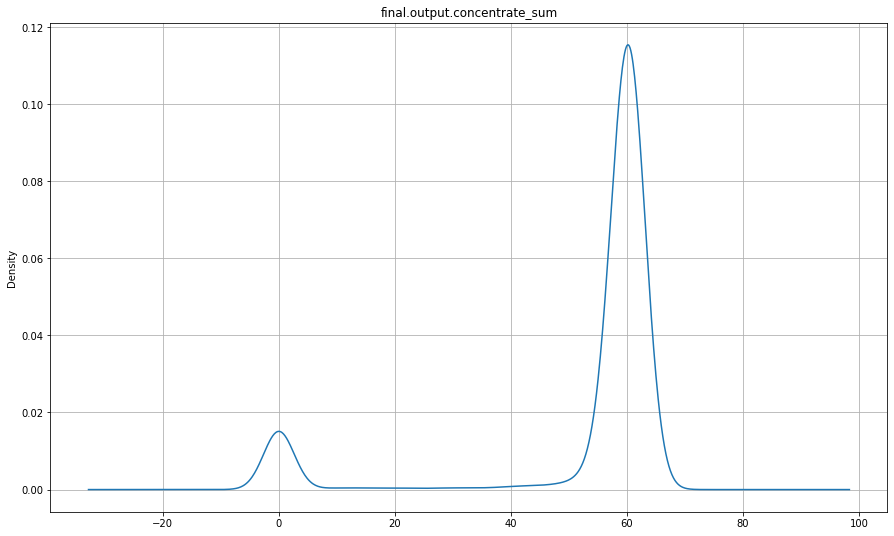

In [30]:
sum_concentrate(df_train, 'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sum')

На данном этапе имеются аномалии (нулевые значения, но их в районе 2-3 % от общей выборки, в принципе можем и удалить)

<a id='section_id3'></a>

# 3. Модель

Данные предобработаны для машинного обучения. Необходимо определить какая модель справляется с задачей лучше

In [31]:
def sMAPE(predict, target):
    total = 0
    for i in range(len(target)):
        numerator = abs(target.iloc[i] - predict.iloc[i])
        denominator = (abs(target.iloc[i]) + abs(predict.iloc[i]))/2
        if ~(np.isnan(numerator) and np.isnan(denominator)):
            total += numerator / denominator
        
    sMAPE = (total / len(target))
    return sMAPE

Разобьем обучающую выборку на обучающую и валидационную

In [32]:
#split rougher
features_train_rougher, features_valid_rougher, target_train_rougher,target_valid_rougher = train_test_split(features_train_rougher,
                                                                                                             target_train_rougher,
                                                                                                             test_size=0.25,
                                                                                                             random_state = 12345)

#split cleaner
features_train_cleaner, features_valid_cleaner, target_train_cleaner,target_valid_cleaner = train_test_split(features_train_cleaner,
                                                                                                             target_train_cleaner,
                                                                                                             test_size=0.25,
                                                                                                             random_state = 12345)

In [33]:
print(features_train_rougher.shape)
print(features_valid_rougher.shape)
print(target_train_rougher.shape)
print(target_valid_rougher.shape)
print()
print(features_train_cleaner.shape)
print(features_valid_cleaner.shape)
print(target_train_cleaner.shape)
print(target_valid_cleaner.shape)

(9744, 22)
(3249, 22)
(9744, 2)
(3249, 2)

(9744, 30)
(3249, 30)
(9744, 2)
(3249, 2)


In [34]:
#функция, которая готовит датафрейм предсказанной выборки и считает эффективности по расчтеным и предсказанным данным
def recovery_pred_target(pred, target, features_valid, col1, col2, col3):
    pred = pd.DataFrame(pred)
    pred.columns = [col1, col2]
    pred.index = target.index
    c_pred, f_pred, t_pred = pred[col2], features_valid[col3], pred[col1]
    c_target, f_target, t_target = target[col2], features_valid[col3], target[col1]
    recovery_pred = ((c_pred * (f_pred - t_pred)) / (f_pred * (c_pred - t_pred))) * 100
    recovery_target = ((c_target * (f_target - t_target)) / (f_target * (c_target - t_target))) * 100
    recovery_pred[recovery_pred<0] = np.nan
    recovery_pred[recovery_pred>100] = np.nan
    recovery_target[recovery_target<0] = np.nan
    recovery_target[recovery_target>100] = np.nan
    return recovery_pred, recovery_target

Выборка разбита на обучающую и валидационную, начнем обучать модели

In [35]:
def randomforestregressor(features_train, target_train, features_valid, target_valid, name1, name2):
    for est in range(10,11,10):
        for depth in range(1, 3):
            model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
            model.fit(features_train, target_train)#обучение
            predictions_valid = model.predict(features_valid)#предсказание концентрации и хвостов золота
            recovery_pred, recovery_target = recovery_pred_target(predictions_valid, target_valid, features_valid_rougher, name1, name2, 'rougher.input.feed_au')
        
            smape = sMAPE(recovery_pred, recovery_target)
    
    return smape, model

In [36]:
smape_rougher, model_rougher = randomforestregressor(features_train_rougher, target_train_rougher, features_valid_rougher, target_valid_rougher,'rougher.output.tail_au', 'rougher.output.concentrate_au')
smape_rougher

0.10291270277968828

In [37]:
smape_cleaner, model_cleaner = randomforestregressor(features_train_cleaner, target_train_cleaner, features_valid_cleaner, target_valid_cleaner,'final.output.tail_au', 'final.output.concentrate_au')
smape_cleaner

0.13584003763309482

In [38]:
final_smape = 0.25*smape_rougher + 0.75*smape_cleaner
final_smape

0.1276082039197432

На валидационной выборке метрика smape показала 0,12 или 12% (симметричное абсолютное отклонение). Посмотрим как она поведет себя на тестовой выборке.

In [39]:
predictions_test_rougher = model_rougher.predict(features_test_rougher)
recovery_pred_test, recovery_target_test = recovery_pred_target(predictions_test_rougher, target_test_rougher, features_test_rougher,'rougher.output.tail_au', 'rougher.output.concentrate_au', 'rougher.input.feed_au')
smape_test_rougher = sMAPE(recovery_pred_test, recovery_target_test)
smape_test_rougher

0.08305657579440265

In [40]:
predictions_test_cleaner = model_cleaner.predict(features_test_cleaner)
recovery_pred_test, recovery_target_test = recovery_pred_target(predictions_test_cleaner, target_test_cleaner, features_test_rougher,'final.output.tail_au', 'final.output.concentrate_au', 'rougher.input.feed_au')
smape_test_cleaner = sMAPE(recovery_pred_test, recovery_target_test)
smape_test_cleaner

0.11733365569379155

In [41]:
final_test_smape = 0.25*smape_test_rougher + 0.75*smape_test_cleaner
final_test_smape

0.10876438571894431

Модель случайный лес показывает на тестовой выборке sMAPE = 10,8 %.

Проверим, как ведет себя модель линейная регрессия

In [42]:
def linearregression(features_train, target_train, features_valid, target_valid, name1, name2):
    model = LinearRegression()
    model.fit(features_train, target_train) #обучение
    predictions_valid = model.predict(features_valid)#предсказание концентрации и хвостов золота
    recovery_pred, recovery_target = recovery_pred_target(predictions_valid, target_valid, features_valid_rougher, name1, name2, 'rougher.input.feed_au')
       
    smape = sMAPE(recovery_pred, recovery_target)
    
    return smape, model

In [43]:
smape_rougher, model_rougher = linearregression(features_train_rougher, target_train_rougher, features_valid_rougher, target_valid_rougher,'rougher.output.tail_au', 'rougher.output.concentrate_au')
smape_rougher

0.08485188986138317

In [44]:
smape_cleaner, model_cleaner = linearregression(features_train_cleaner, target_train_cleaner, features_valid_cleaner, target_valid_cleaner,'final.output.tail_au', 'final.output.concentrate_au')
smape_cleaner

0.10905322842043794

In [45]:
final_smape = 0.25*smape_rougher + 0.75*smape_cleaner
final_smape

0.10300289378067423

Линейная регрессия показала лучше метрику (я правильно понял чем она ниже, тем лучше? Это же все-таки метрика отклонения в процентном соотношение:-)). Проверим на тесте.

In [46]:
def predict_test(model, features, target, col1, col2):
    predictions = model.predict(features)
    recovery_pred, recovery_target = recovery_pred_target(predictions, target, features_test_rougher,col1, col2, 'rougher.input.feed_au')
    smape = sMAPE(recovery_pred, recovery_target)
    
    return smape, recovery_pred

In [47]:
smape_test_rougher, recovery_pred_test_rougher = predict_test(model_rougher, features_test_rougher, target_test_rougher, 'rougher.output.tail_au', 'rougher.output.concentrate_au')
smape_test_rougher

0.07479432564098397

In [48]:
smape_test_cleaner, recovery_pred_test_cleaner = predict_test(model_cleaner, features_test_cleaner, target_test_cleaner, 'final.output.tail_au', 'final.output.concentrate_au')
smape_test_cleaner

0.11681077487644549

In [49]:
final_test_smape = 0.25*smape_test_rougher + 0.75*smape_test_cleaner
final_test_smape

0.10630666256758012

## Проверим нашу модель константной величиной (медианой target_train)

In [50]:
def pred_train_const(target, col1, col2):
    target_1 = pd.Series(target[col1].median(), index = target.index)
    target_2 = pd.Series(target[col2].median(), index = target.index)
    pred = pd.DataFrame({col1: target_1,
                         col2: target_2})
    
    return pred

In [51]:
pred_train_const_rougher = pred_train_const(target_train_rougher, 'rougher.output.tail_au', 'rougher.output.concentrate_au')
len(features_test_rougher)

5288

In [52]:
recovery_pred_const_rougher, recovery_target_const = recovery_pred_target(pred_train_const_rougher, target_train_rougher, features_train_rougher, 'rougher.output.tail_au', 'rougher.output.concentrate_au', 'rougher.input.feed_au')
smape_train_const_rougher = sMAPE(recovery_pred_const_rougher, recovery_target_const)
smape_train_const_rougher

0.10678285587731234

In [53]:
pred_train_const_cleaner = pred_train_const(target_train_cleaner, 'final.output.tail_au', 'final.output.concentrate_au')
pred_train_const_cleaner.head()

,final.output.tail_au,final.output.concentrate_au
7979,2.857041,44.829737
12138,2.857041,44.829737
3445,2.857041,44.829737
16297,2.857041,44.829737
6063,2.857041,44.829737


In [54]:
recovery_pred_const_cleaner, recovery_target_const = recovery_pred_target(pred_train_const_cleaner, target_train_cleaner, features_train_rougher, 'final.output.tail_au', 'final.output.concentrate_au', 'rougher.input.feed_au')
smape_train_const_cleaner = sMAPE(recovery_pred_const_cleaner, recovery_target_const)
smape_train_const_cleaner

0.1302134412610312

In [55]:
final_test_smape = 0.25*smape_train_const_rougher + 0.75*smape_train_const_cleaner
final_test_smape

0.1243557949151015

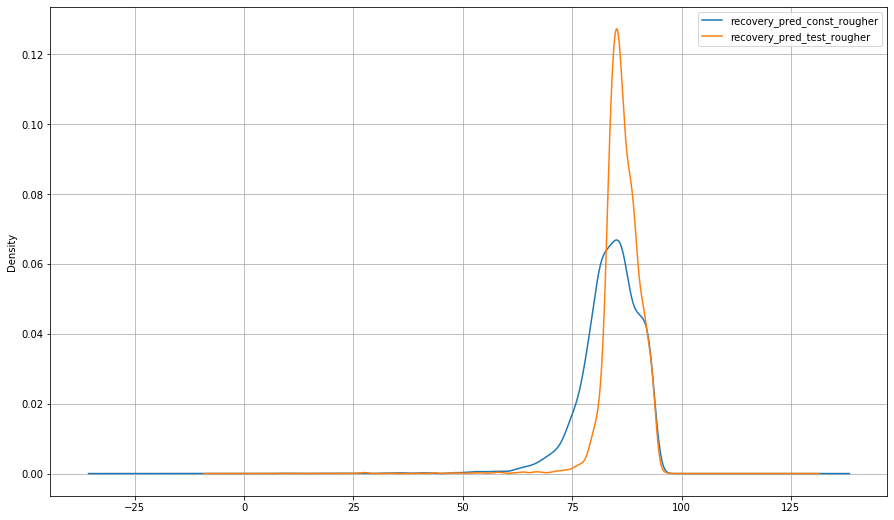

In [56]:
ax = recovery_pred_const_rougher.plot(kind='kde', figsize=(15,9), grid=True)
ax = recovery_pred_test_rougher.plot(kind='kde', figsize=(15,9), grid=True)
ax.legend(['recovery_pred_const_rougher', 'recovery_pred_test_rougher'])

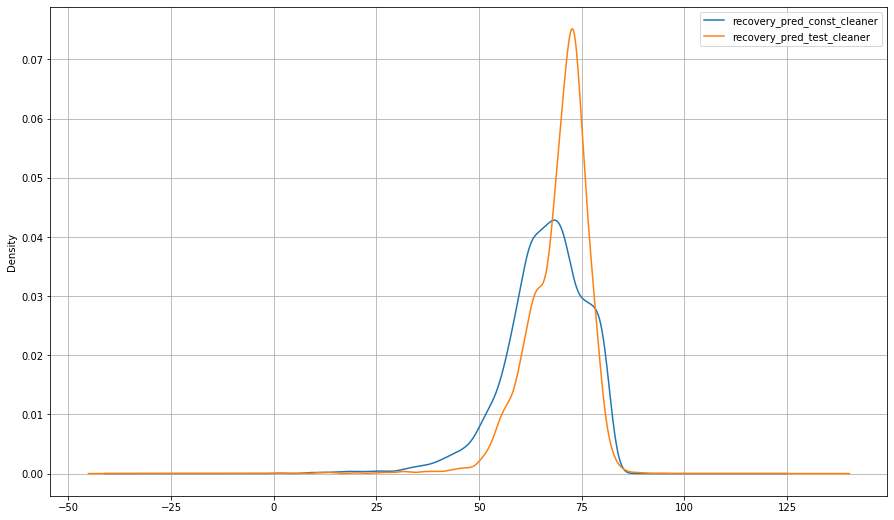

In [57]:
ax = recovery_pred_const_cleaner.plot(kind='kde', figsize=(15,9), grid=True)
ax = recovery_pred_test_cleaner.plot(kind='kde', figsize=(15,9), grid=True)
ax.legend(['recovery_pred_const_cleaner', 'recovery_pred_test_cleaner'])

sMAPE на константной модели показало метрику хуже чем при тестировании линейной регрессии и модели случаного леса (на константной модели метрика 0,12 против 0,10 на линейной регресии). На графиках видим что эффективность модели лучше.

<a id='section_id4'></a>

# Вывод

Итак, необходимо было подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении были данные с параметрами добычи и очистки.

Мы имели 3 датафрейма: обучающая, тестовая и иходный (сырой) датафрейм. В каждом из них было очень много пропусков, которые мы просто напросто удалили (было очень много пустых строк, которые было бесполезно заполнять каки-либо из способов без знания самого технологического процесса). Эффективность обогащения была посчитана верно (ошибка 9e-15).

На этапе исследовательского анализа были построены графики изменения концентрации металлов на каждом этапе (флотация, первичная очистка, вторичная и финальная). Как было показано на графиках концентрация золота становилась больше (оно и правильно иначе наш технологический процесс был несовершенен и основная концентрация металла уходила бы в хвосты). Были посчитаны суммарные концентрации всех металлов, имелись аномалии в районе 2-3 %.

На этапе машинного обучения было применено 2 модели: случайный лес и линенйная регрессия. Хоть линейная регрессия показала себя лучше (10,3 против 12,7), на тестовой выборке sMAPE практически идентичны (10,63 против 10,87)